<center><h1> Projet eC2F</h1></center>

# _Prévision de la consommation d'électricité en France_



- **Partie 1 : Analyse exploratoire et Data Visualisation**
- Partie 2 : Machine Learning - Modèles de Regression
- Partie 3 : Machine Learning - Modèles de Séries Temporelles
- Partie 4 : Machine Learning - Modèle LSTM 

# Partie 1 : Analyse exploratoire des données et Data Visualisation 

> Le jeu de données utilisé, provient de l’[Open Data Réseaux Energie (ODRE)](https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/export/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure), il représente les données énergétiques régionales (au pas de 30 minutes) consolidées depuis janvier 2020 et définitives de janvier 2013 à décembre 2019, elles sont issues de l'application [éCO2mix](https://www.rte-france.com/eco2mix).



## Etape 1 : Exploration des données du dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")


# Chargement du DataSet

#data = pd.read_csv('/Users/Geoffroy/Documents/DA_DataScientest/Projet Energie/eco2mix-regional-cons-def (1).csv', sep=';')


data=pd.read_csv('energy_full.csv', sep = ';')
#data=pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';')


# On affiche les dimensions du DF et on l'affiche
print("Le DataSet possède", data.shape[0], " lignes et ", data.shape[1], " colonnes.")

# Affichage du dataset
data.head()

Le DataSet possède 1665216  lignes et  66  colonnes.


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 64
0,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identification de la variable cible

<hr/>
La variable 'cible' à prédire est : <b>'Consommation (MW)'</b>. 
<hr/>

### Analyse globale des variabes

In [2]:
print("Les informations sur les variables sont données ci-dessous:", "\n")
data.info()

Les informations sur les variables sont données ci-dessous: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665216 entries, 0 to 1665215
Data columns (total 66 columns):
 #   Column                                                    Non-Null Count    Dtype  
---  ------                                                    --------------    -----  
 0   Code INSEE région                                         1665216 non-null  int64  
 1   Région                                                    1665216 non-null  object 
 2   Nature                                                    1665216 non-null  object 
 3   Date                                                      1665216 non-null  object 
 4   Heure                                                     1665216 non-null  object 
 5   Date - Heure                                              1665216 non-null  object 
 6   Consommation (MW)                                         1665204 non-null  float64
 7   Thermique (MW)     

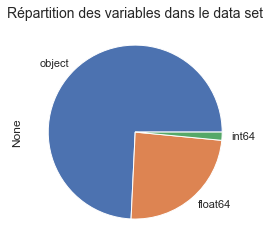

In [3]:
# Déterminer les type de variables constituants le dataset
data.dtypes.value_counts().plot.pie();
plt.title('Répartition des variables dans le data set', fontsize=14);

In [4]:
data.dtypes.value_counts()

object     49
float64    16
int64       1
dtype: int64

### Exploration des valeurs manquantes

In [5]:
# Exploration des valeurs manquantes
pd.set_option('display.max_rows', data.shape[1])

dp = round(data.isna().sum()/data.shape[0],2)*100
dr = data.isna().sum()
dt = pd.DataFrame(data = dr, columns = ['Nombre de NaN'], index=dr.index)
dt['Propotion (%)'] = dp
dt

,Nombre de NaN,Propotion (%)
Code INSEE région,0,0.0
Région,0,0.0
Nature,0,0.0
Date,0,0.0
Heure,0,0.0
Date - Heure,0,0.0
Consommation (MW),12,0.0
Thermique (MW),12,0.0
Nucléaire (MW),693847,42.0
Eolien (MW),108,0.0


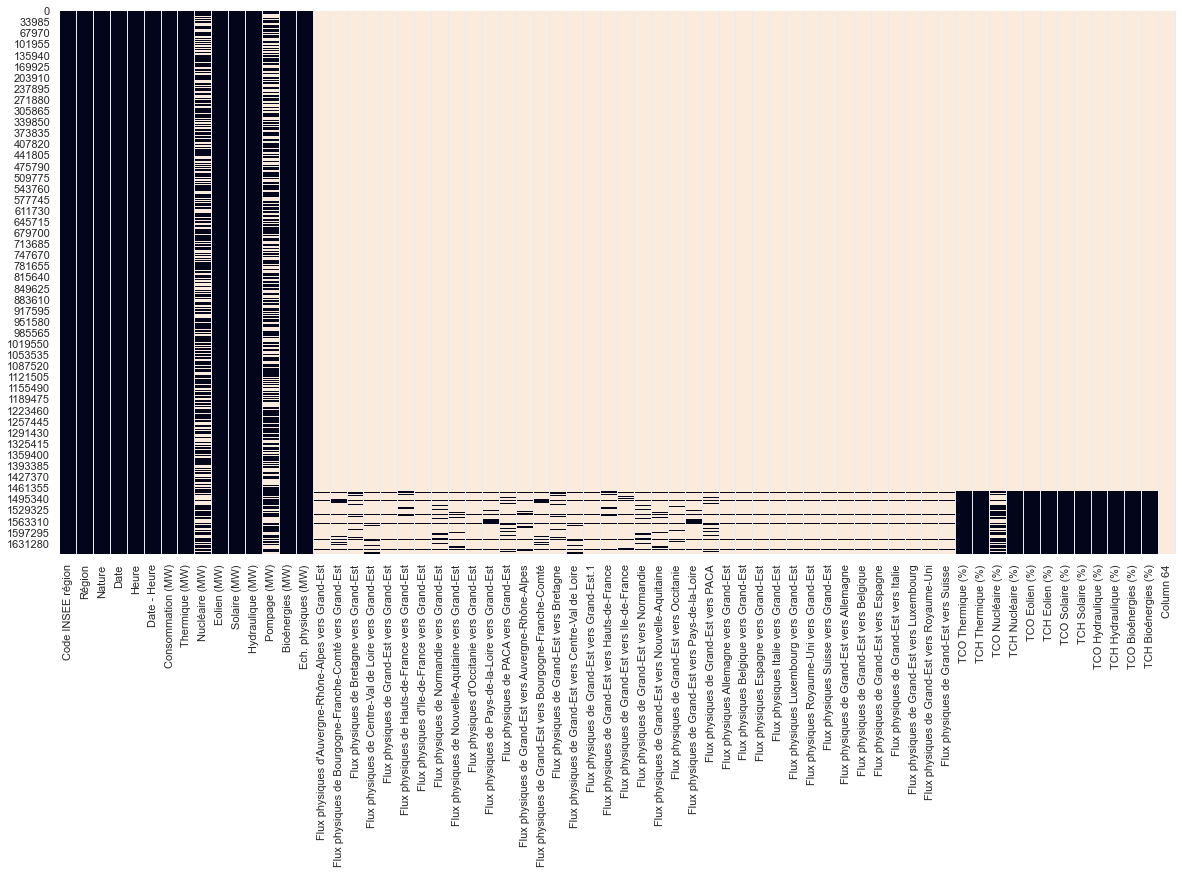

In [6]:
# Visualisation des Valeurs manquantes

plt.figure(figsize=(20,10));
sns.heatmap(data.isna(), cbar=False); 

<hr/>

Cette visualisation nous permet de constater : 

- Les variables de Flux physiques entre régions et celles de TCO et TCH, ne sont disponibles qu’à partir d’une certaine date.
- La variable « Column 64 » elle ne représente que des valeurs manquantes.
- Les valeurs manquantes des variables « Nucléaire (MW) » et « Pompage (MW) » sont réparties tout au long du data set.

<hr/>

### Analyse des valeurs manquantes de la variable cible

In [7]:
data[data["Consommation (MW)"].isna() == True]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 64
0,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,Ile-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr/>
Les 12 valeurs 'NaN' de la variable cible 'Consommation (MW) sont les 12 premières lignes à minuit du 1er jour.
Il s'agit vraissemblablement d'un problème d'acquisition de données. Ces 12 lignes seront par la suite supprimées.

**Action Préprocessing n°1 :** Supprimer les lignes manquantes de la variable cible.

<hr/>

### Analyse des valeurs manquantes des autres variables

In [8]:
data[(data["Nucléaire (MW)"].isna() == True) & (data["Consommation (MW)"].isna() == False)]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 64
13,52,Pays de la Loire,Données définitives,2013-01-01,00:30,2013-01-01T00:30:00+01:00,3595.0,127.0,NaN,182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:30,2013-01-01T00:30:00+01:00,2357.0,236.0,NaN,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,11,Ile-de-France,Données définitives,2013-01-01,00:30,2013-01-01T00:30:00+01:00,9134.0,685.0,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:30,2013-01-01T00:30:00+01:00,5570.0,537.0,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,53,Bretagne,Données définitives,2013-01-01,00:30,2013-01-01T00:30:00+01:00,3050.0,58.0,NaN,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665206,93,Provence-Alpes-Côte d'Azur,Données consolidées,2020-11-30,23:30,2020-11-30T23:30:00+01:00,5754.0,1865.0,NaN,23.0,...,-,0.40,47.92,0.00,0,21.38,37.56,1.39,27.21,NaN
1665208,11,Ile-de-France,Données consolidées,2020-11-30,23:30,2020-11-30T23:30:00+01:00,10017.0,509.0,NaN,40.0,...,-,0.40,37.74,0.00,0,0.07,35,1.26,39.5,NaN
1665210,53,Bretagne,Données consolidées,2020-11-30,23:30,2020-11-30T23:30:00+01:00,3056.0,225.0,NaN,189.0,...,-,6.18,17.93,0.03,0.4,6.45,71.64,1.57,62.34,NaN
1665212,27,Bourgogne-Franche-Comté,Données consolidées,2020-11-30,23:30,2020-11-30T23:30:00+01:00,3010.0,122.0,NaN,297.0,...,-,9.87,34.74,0.00,0,0.66,3.83,1.53,60.53,NaN


<hr/>
Après une analyse plus approfondie du dataset, nous avons constaté que les 'NaN' des variables 'Nucléaire (MW)' et 'Pompage (MW)' ne sont présentes que dans les régions qui ne produisent pas ce type d'énergie, et par conséquent, ces valeurs manquantes peuvent être remplacées par des 0 grâce à la méthode fillna()

Ceci est valable pour les données définitives et consolidées et aussi pour les autres variables de production.

**Action Préprocessing n°2 :** Remplacer les valeurs 'NaN' par 0 pour les variables 'Nucléaire (MW)' et 'Pompage (MW)'.

In [9]:
data[data["Flux physiques d'Auvergne-Rhône-Alpes vers Grand-Est"].notna() == True]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 64
1472267,44,Grand-Est,Données consolidées,2020-01-01,00:00,2020-01-01T00:00:00+01:00,5745.0,1527.0,11978.0,1135.0,...,-,19.76,-,0.0,-,19.32,-,2.52,-,NaN
1472273,44,Grand-Est,Données consolidées,2020-01-01,00:30,2020-01-01T00:30:00+01:00,5570.0,1487.0,12092.0,1023.0,...,-,18.37,-,0.0,-,17.06,-,2.10,-,NaN
1472288,44,Grand-Est,Données consolidées,2020-01-01,01:00,2020-01-01T01:00:00+01:00,5415.0,1354.0,11947.0,822.0,...,-,15.18,-,0.0,-,17.36,-,2.18,-,NaN
1472303,44,Grand-Est,Données consolidées,2020-01-01,01:30,2020-01-01T01:30:00+01:00,5454.0,1173.0,12160.0,800.0,...,-,14.67,-,0.0,-,17.25,-,2.13,-,NaN
1472306,44,Grand-Est,Données consolidées,2020-01-01,02:00,2020-01-01T02:00:00+01:00,5518.0,988.0,12153.0,777.0,...,-,14.08,-,0.0,-,17.05,-,2.10,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665158,44,Grand-Est,Données consolidées,2020-11-30,21:30,2020-11-30T21:30:00+01:00,6574.0,1542.0,10754.0,1322.0,...,99.39,20.11,35.15,0.0,0,10.19,29.02,1.87,50.62,NaN
1665171,44,Grand-Est,Données consolidées,2020-11-30,22:00,2020-11-30T22:00:00+01:00,6369.0,1368.0,10754.0,1317.0,...,99.39,20.68,35.02,0.0,0,8.26,22.78,1.93,50.62,NaN
1665183,44,Grand-Est,Données consolidées,2020-11-30,22:30,2020-11-30T22:30:00+01:00,6440.0,1145.0,10750.0,1503.0,...,99.35,23.34,39.96,0.0,0,7.07,19.71,1.89,50.21,NaN
1665200,44,Grand-Est,Données consolidées,2020-11-30,23:00,2020-11-30T23:00:00+01:00,6373.0,1279.0,10745.0,1623.0,...,99.31,25.47,43.15,0.0,0,7.01,19.36,1.90,49.79,NaN


<hr/>
Cet affichage nous montre qu'à partir du 01/01/2020 les données 'Flux' ne sont plus avec des valeurs 'NaN'.
Il en est de même avec les valeurs de 'TCO' / 'TCH'.

Ces données n'étant disponible que sur la période de 2020, elles ne seront pas étudiées sur l'étude principale.
Une analyse sur 2020 sera néamoins effectuée.

Pour l'étude secondaire, centrée sur l'année 2020, il conviendra de traiter les valeurs '-' et 'ND'.

**Action Préprocessing n°3 :** Supprimer les variables 'Flux', 'TCO' et 'TCH' du dataframe principal.

<hr/>

##### Actions supplémentaires à réaliser sur le DataFrame

En plus des actions identifiées précédemment, les actions suivantes vont être appliquées :

- **Action Préprocessing n°4 :** Remplacer le nom de la variable 'Nature' par 'Données définitives' et remplacer les 2 valeurs possibles par 0, 1.
    -> Données consolidées = 0
    -> Données définitives = 1
- **Action Préprocessing n°5 :** Dissocier la colonne 'Date' en colonnes 'Jour', 'Mois' et 'Année' et 'Jour_semaine'
- **Action Préprocessing n°6 :** Supprimer la colonne 'Date-Heure'
- **Action Préprocessing n°7 :** Créer une colonne supplémentaire 'Prod_renouvelables_MW' comme étant la somme des variables 'Eoliens', 'Solaire', 'Hydraulique', 'Bioénergies' + une colonne 'Prod_totale_MW.
- **Action Préprocessing n°8 :** Renommer les colonnes Thermique, Nucléaire, Pompage en Prod_fossiles, Prod_nucleaire, Prod_step + Renommer l'ensemble des colonnes en éliminant les accents, espaces et caractères spéciaux.

## Etape 2 : PreProcessing des données

In [10]:
#Copie du Dataframe principal
df = data.copy()

### Data Cleaning

In [11]:
# Supprimer la dernière colonne 
df = df.drop(['Column 64'], axis=1)

# supprimer les colonnes de flux, TCO et TCH (non disponibles avant 2020)
colonne = df.columns[15:]
df = df.drop(columns=colonne)

# Supprimer les lignes où la consommation est manquante (12 lignes)
df= df.dropna(axis=0, subset=['Consommation (MW)'])

#  Remplacer les valeurs manquantes des variables de production par des 0
df= df.fillna(0)

### Data Processing

In [12]:
# Création d'une nouvelle variable 'Année' à partir de la variable Date

def get_daymonthyear(chaine, num, sep='-'):
    liste = chaine.split(sep)
    return liste[num]

j = df['Date'].apply(get_daymonthyear, args=[2])
m = df['Date'].apply(get_daymonthyear, args=[1])
a = df['Date'].apply(get_daymonthyear, args=[0])

df['Jour'] = j
df['Mois'] = m
df['Année'] = a


### On change le type de la colonne 'Date' pour le définir sur date
df['Date'] = pd.to_datetime(df['Date'])

### Cela permet de récupérer le jour de la semaine
df['Jour_semaine'] = df['Date'].dt.weekday

In [13]:
# Remplacement des modalitées pour la colonne nature (2 modalités : Consolidées=0/définitives=1) 
df['Nature'].replace(to_replace=['Données définitives', 'Données consolidées'], value=[1,0], inplace=True)

# Renommer les colonnes
renom_col={'Nature': 'Donnees_definitives',
          'Thermique (MW)': 'Prod_fossiles_MW',
          'Nucléaire (MW)': 'Prod_nucleaire_MW',
          'Pompage (MW)': 'Prod_STEP_MW',
          'Code INSEE région': 'Code_INSEE_region',
          'Région': 'Region',
          'Date - Heure': 'Date_Heure',
           'Consommation (MW)': 'Consommation_MW',
           'Eolien (MW)': 'Eolien_MW',
           'Solaire (MW)': 'Solaire_MW',
           'Hydraulique (MW)': 'Hydraulique_MW',
           'Bioénergies (MW)': 'Bioenergies_MW',
           'Ech. physiques (MW)': 'Echanges_physiques_MW'}

df.rename(renom_col, axis = 1, inplace=True)

In [14]:
# Création de la variable 'Prod_EnR_MW' pour le total des productions d'énergie renouvelable
df['Prod_EnR_MW'] = df['Eolien_MW'] + df['Solaire_MW'] + df['Hydraulique_MW'] + df['Bioenergies_MW']

# Création de la variable 'Prod_fossiles_MW' pour le total des productions d'énergie fossiles
df['Prod_totale_MW'] = df['Prod_fossiles_MW'] + df['Prod_nucleaire_MW'] + df['Prod_STEP_MW'] + df['Prod_EnR_MW']

In [15]:
# Réorganisation manuelle des colonnes
df = df[['Code_INSEE_region', 'Region', 'Donnees_definitives', 
                         'Date', 'Jour', 'Mois', 'Année', 'Jour_semaine','Heure',
                         'Consommation_MW','Prod_totale_MW', 'Prod_fossiles_MW', 'Prod_nucleaire_MW','Prod_STEP_MW', 
                         'Prod_EnR_MW','Eolien_MW','Solaire_MW', 'Hydraulique_MW', 'Bioenergies_MW', 'Echanges_physiques_MW']]

In [16]:
# On ne garde que les données entre le 01/01/2013 et le 31/12/2019
df = df[df["Date"].isin(pd.date_range('2013-1-1', '2019-12-31'))]
df.head()

,Code_INSEE_region,Region,Donnees_definitives,Date,Jour,Mois,Année,Jour_semaine,Heure,Consommation_MW,Prod_totale_MW,Prod_fossiles_MW,Prod_nucleaire_MW,Prod_STEP_MW,Prod_EnR_MW,Eolien_MW,Solaire_MW,Hydraulique_MW,Bioenergies_MW,Echanges_physiques_MW
12,76,Occitanie,1,2013-01-01,01,01,2013,1,00:30,5228.0,3953.0,78.0,2497.0,-13.0,1391.0,367.0,0.0,943.0,81.0,1273.0
13,52,Pays de la Loire,1,2013-01-01,01,01,2013,1,00:30,3595.0,341.0,127.0,0.0,0.0,214.0,182.0,0.0,0.0,32.0,3252.0
14,27,Bourgogne-Franche-Comté,1,2013-01-01,01,01,2013,1,00:30,2357.0,459.0,236.0,0.0,0.0,223.0,106.0,0.0,105.0,12.0,1894.0
15,28,Normandie,1,2013-01-01,01,01,2013,1,00:30,3683.0,8914.0,432.0,8200.0,0.0,282.0,216.0,0.0,12.0,54.0,-5233.0
16,32,Hauts-de-France,1,2013-01-01,01,01,2013,1,00:30,5989.0,6512.0,828.0,4499.0,0.0,1185.0,1115.0,0.0,1.0,69.0,-525.0


## Etape 3 : Etude du dataset

### Etude de la corrélation entre les variables

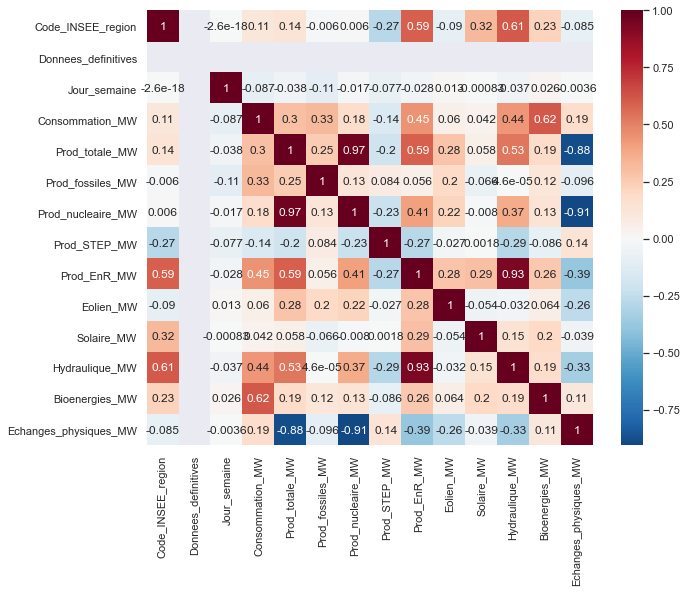

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu_r', center = 0);

### Analyse distribution des variables par région

Pour cette analyse visuelle, nous avons divisé notre dataset principal en plusieurs datasets régionaux, afin d'analyser la distribution de chaque variable en fonction des régions. <br/><br/>
L'analyse de la distribution se fera à l'aide de boites à moustaches.

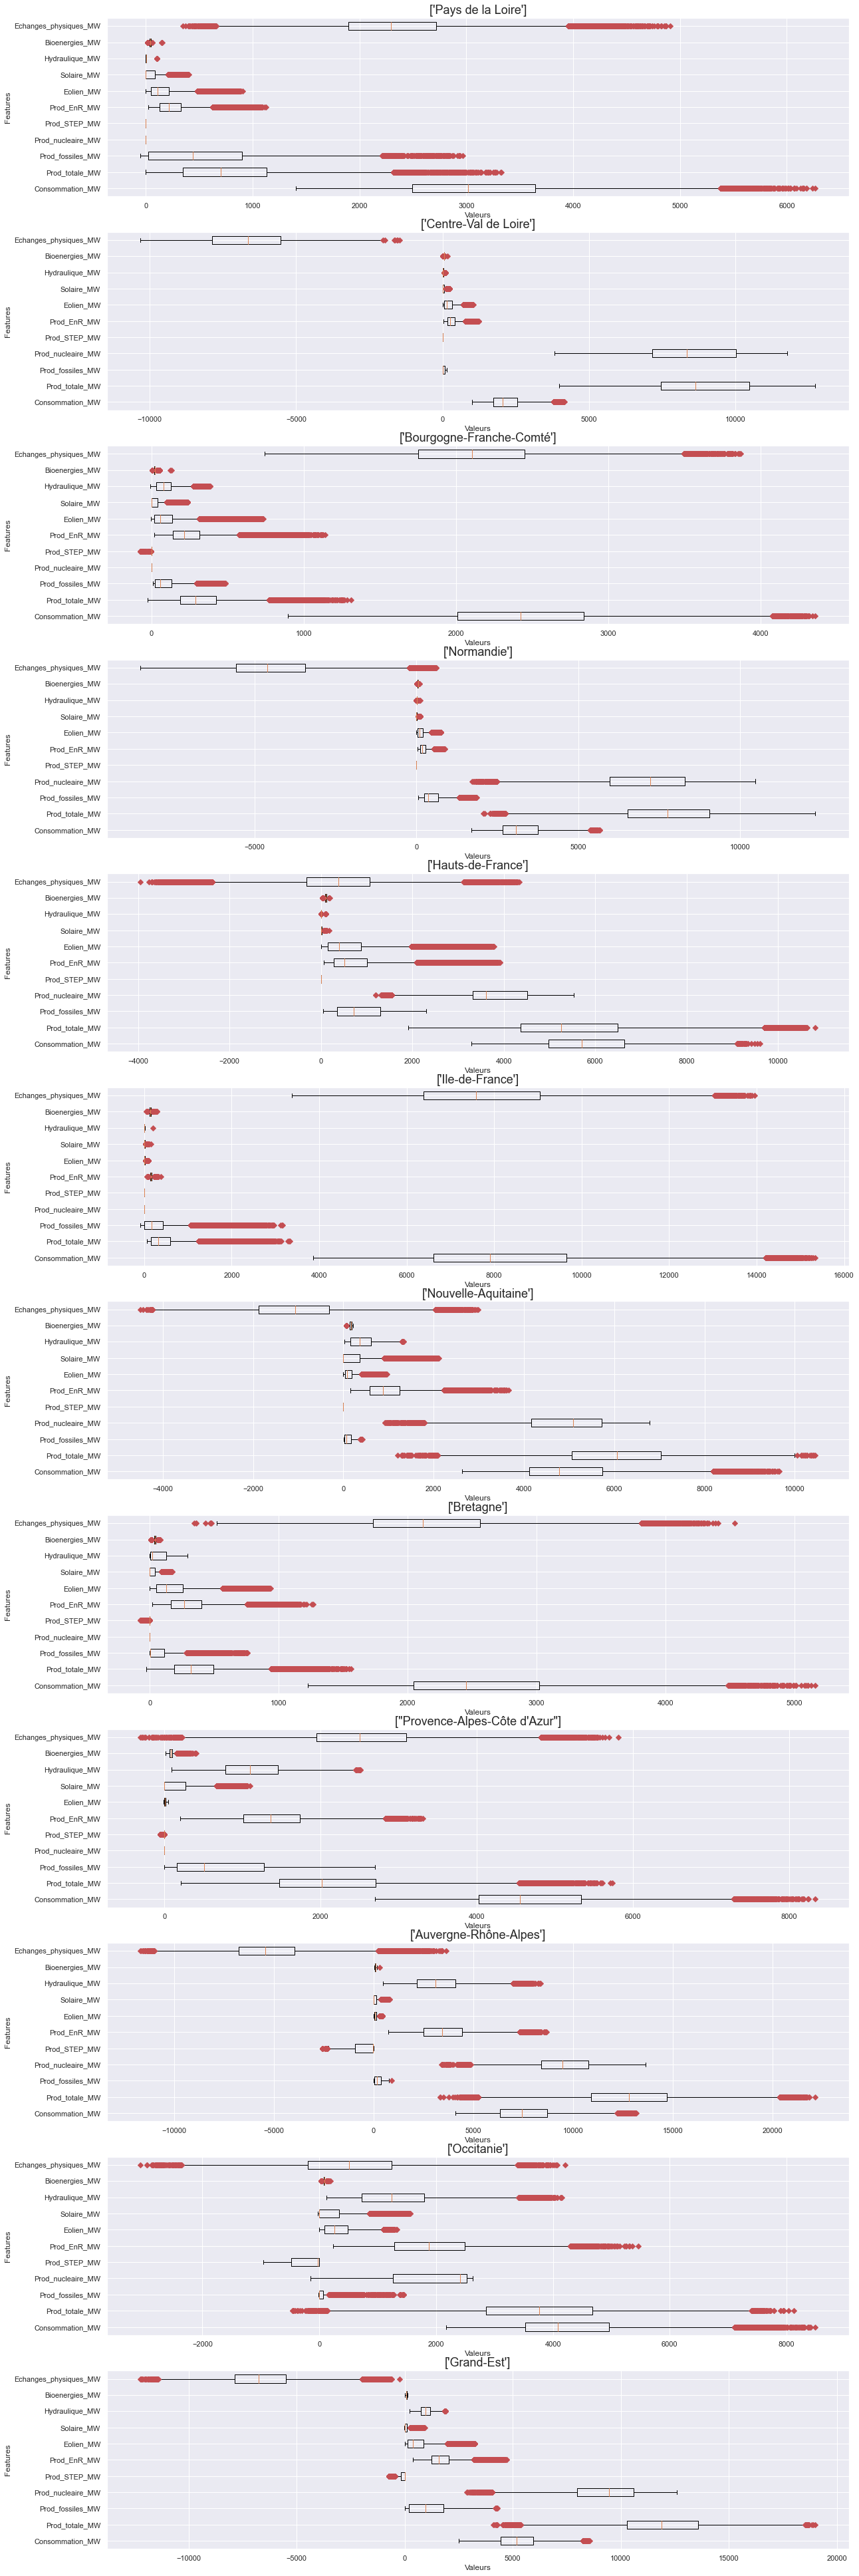

In [18]:
code_region=[]
for code in df['Code_INSEE_region'].unique():
    code_region.append(code)



df_52 = df[df['Code_INSEE_region']== 52]
df_24 = df[df['Code_INSEE_region']== 24]
df_27 = df[df['Code_INSEE_region']== 27]
df_28 = df[df['Code_INSEE_region']== 28]
df_32 = df[df['Code_INSEE_region']== 32]
df_11 = df[df['Code_INSEE_region']== 11]
df_75 = df[df['Code_INSEE_region']== 75]
df_53 = df[df['Code_INSEE_region']== 53]
df_93 = df[df['Code_INSEE_region']== 93]
df_84 = df[df['Code_INSEE_region']== 84]
df_76 = df[df['Code_INSEE_region']== 76]
df_44 = df[df['Code_INSEE_region']== 44]

dfs = [df_52, df_24, df_27, df_28, df_32, df_11, df_75, df_53, df_93, df_84, df_76, df_44]



fig, axes = plt.subplots(12,1, figsize=(20,70));

features = list(df.keys())
features = features[9:]

c = 0
j=0
for i in range(12):
     
        dfx= dfs[c]
        
        axes[i].boxplot(dfx[features].values, 0, 'rD', labels=features, vert=False)
        
        axes[i].set_title(dfx['Region'].unique(), fontsize=18)
        axes[i].set_ylabel('Features')
        axes[i].set_xlabel('Valeurs')
        c += 1

<hr/>
L'analyse visuelle de la distribution des variables indique la présence de beaucoup de valeurs aberrantes sur les variables de notre dataset. Ceci est du au fait que la distribution de chaque variable varie en fonction des saisons et des années, avec une évolution annuelle.
<hr/>

### Analyse visuelle de l'évolution annuelle de la consommation énergétique moyenne en régions

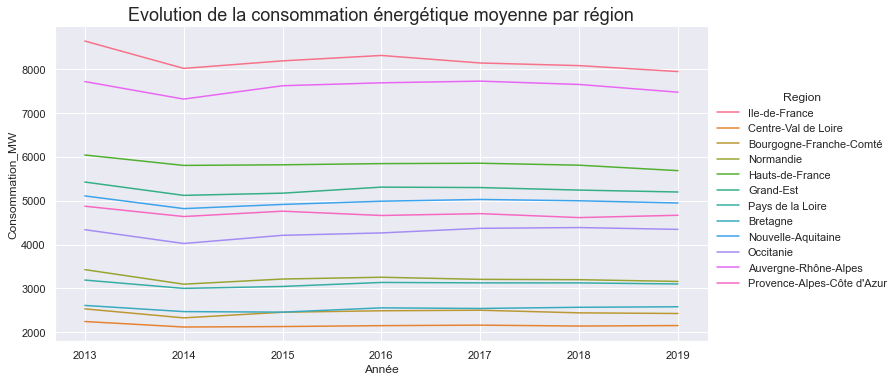

In [19]:
df_annuel_moy = df.groupby(['Année','Code_INSEE_region', 'Region'], as_index=False).mean()
sns.relplot(x='Année', 
            y='Consommation_MW', 
            hue='Region',  
            data=df_annuel_moy, 
            kind='line', aspect=2);
plt.title('Evolution de la consommation énergétique moyenne par région', fontsize=18);

<hr/>
Le graphique de l'évolution de la consommation energétique moyenne par région nous permet de constater :<br>

- Une chute de la consommation moyenne annuelle dans toutes les régions en 2014, ceci s'explique par la montée de la température annuelle nationale de 1.2°C [Article : Chaleur : 2014, année record en France et en Europe depuis 1900](https://www.leparisien.fr/environnement/chaleur-2014-annee-record-en-france-et-en-europe-depuis-1900-05-01-2015-4420799.php#:~:text=Ces%20pr%C3%A9visions%20ont%20%C3%A9t%C3%A9%20confirm%C3%A9es,p%C3%A9riode%20entre%201981%20et%202010.).
<br/>
- Un retour en 2015 à un niveau de consommation moyen similaire à celui de 2013
- Une certaine stabilité de consommation entre 2015 et 2018 
- Une chute de la consommation moyenne dans certaines régions  
<hr/>

### Analyse visuelle de l'évolution annuelle de la Production énergétique nationale

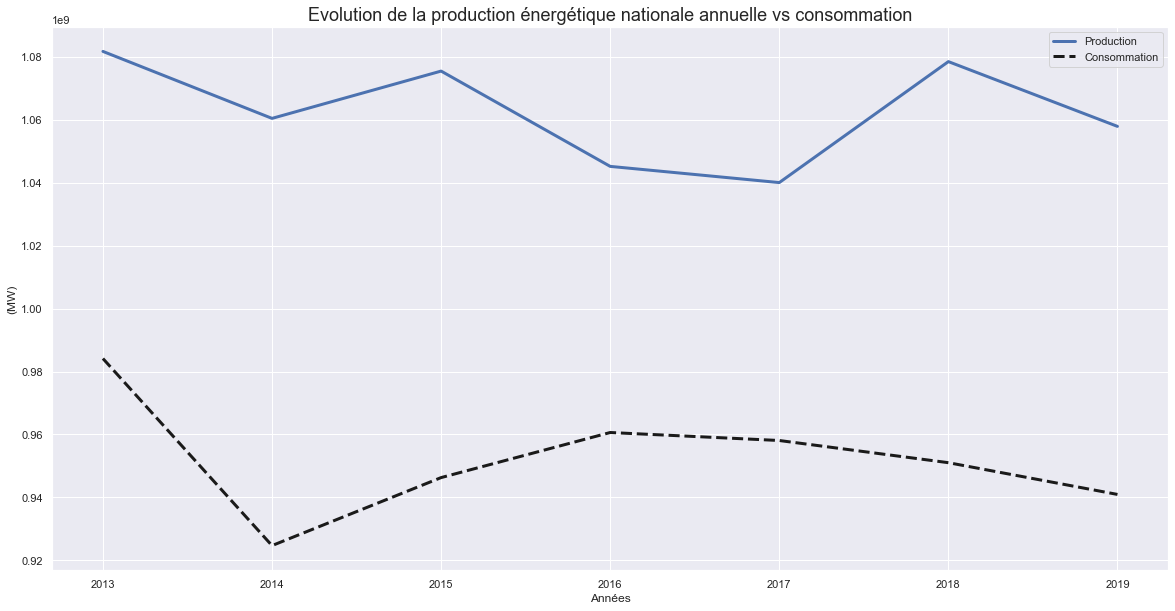

In [20]:
df_annuel_som = df.groupby(['Année'], as_index=False).sum()
plt.figure(figsize=(20,10));

plt.plot(df_annuel_som['Année'], df_annuel_som['Prod_totale_MW'],'b-', label='Production',linewidth=3);
plt.plot(df_annuel_som['Année'], df_annuel_som['Consommation_MW'], 'k--', label='Consommation',linewidth=3);

#plt.plot(df_annuel_som['Année'], df_annuel_som['Prod_ren'], 'r-', label='Production renouvelable');

plt.legend();
plt.title("Evolution de la production énergétique nationale annuelle vs consommation", fontsize=18);
plt.xlabel("Années");
plt.ylabel('(MW)');

<hr/>
Le graphique de l'évolution annuelle de la production energétique nationale vs la consommation nous permet de constater :<br>

- La production énergétique est dans une certaine mesure proportionnelle à la consommation énergétique, avec une certain phasage de sécurité, afin d'éviter les risques de Black out .
<hr/>

### Analyse visuelle de répartition mensuelle de la consommation énergétique nationale par année

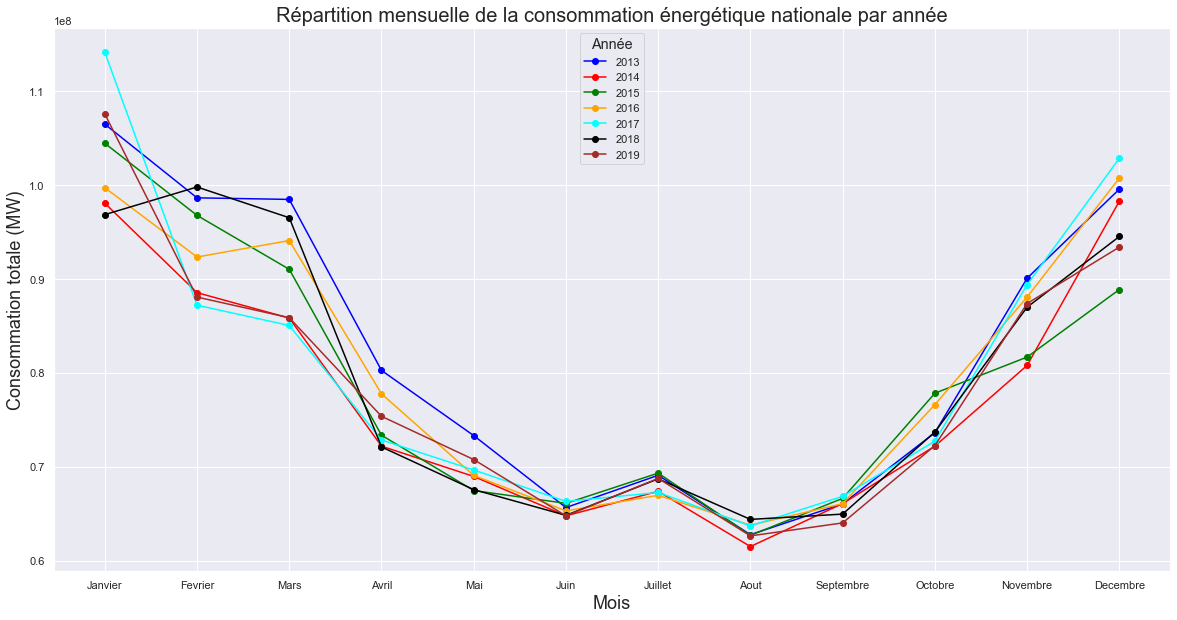

In [21]:
df_annuel_som = df.groupby(['Année', 'Mois'], as_index=False).sum()
annee = ['2013', '2014', '2015','2016','2017','2018','2019']
couleur =['blue', 'red', 'green', 'orange', 'cyan', 'black', 'brown', 'olive', 'pink']
figure = plt.figure(figsize=(20,10));
c=0
for an in annee:
    
    ind = df_annuel_som[df_annuel_som['Année']== an]['Mois']
    valeurs = df_annuel_som[df_annuel_som['Année']== an]['Consommation_MW'].values
    plt.plot(ind, valeurs,color=couleur[c], label=an, marker='o');
    
    c+=1


plt.legend(title='Année', title_fontsize='large', loc=9);
plt.xlabel('Mois', fontsize=18);
plt.ylabel('Consommation totale (MW)', fontsize=18);
plt.xticks(np.arange(0,12,1), ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']);
plt.title('Répartition mensuelle de la consommation énergétique nationale par année', fontsize=20);

<hr/>
Le graphique de répartition mensuelle de la consommation énergétique nationale nous permet de constater :<br>

- La consommation énergétique varie en fonction des saisons.
- Le maximum de consommation est atteint pendant l'hiver
- Le minimum de consommation est atteint pendant le mois d'Aout
- Une certaine symétrie entre le printemps et l'automne.

<br/>
Ce graphique est très riche en information car il montre la répététivité de la variable consommation en fonction des mois de l'année, et donc permet d'affirmer une importante corrélation entre ces deux variables
<hr/>

### Analyse de la production énergétique

In [22]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [23]:
Annees = ['2013','2014','2015','2016','2017','2018','2019']
Regions = df['Region'].unique()

df_2013 = df[df['Année']== '2013']
df_2014 = df[df['Année']== '2014']
df_2015 = df[df['Année']== '2015']
df_2016 = df[df['Année']== '2016']
df_2017 = df[df['Année']== '2017']
df_2018 = df[df['Année']== '2018']
df_2019 = df[df['Année']== '2019']

dfs = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]
dico = {2013:0, 2014:1, 2015:2, 2016:3, 2017:4, 2018:5, 2019:6}

def Afficher_courbes(Annee, Region):
    Annee = int(Annee)
    dfi = dfs[dico[Annee]]    
    dfi = dfi[dfi['Region']==Region]
    valeurs = [dfi['Prod_nucleaire_MW'].values[0], dfi['Prod_fossiles_MW'].values[0], dfi['Prod_EnR_MW'].values[0]]
    valeurs = valeurs/dfi['Prod_totale_MW'].values[0]
    couleurs = ['brown', 'orange', 'green']
    labels = ['Energie Nucléaire', 'Energie fossile', 'Energie Renouvelable']
    explode = [0.0,0.0,0.1]
    ind=[]
    for index, v in enumerate(valeurs):
        if v==0:
            ind.append(index)
    valeurs = np.delete(valeurs, ind)
    couleurs = np.delete(couleurs, ind)
    labels = np.delete(labels, ind)  
    explode = np.delete(explode, ind)
    
    plt.figure(figsize=(20,7))
    
    plt.subplot(121)
    plt.pie(valeurs, 
            labels = labels,
            colors = couleurs,
            explode = explode,
            autopct = lambda x:str(round(x,2)) + '%',
            pctdistance = 0.7,
            labeldistance=1.1,
            counterclock=True,
            startangle=90,
            textprops=dict(color="k", fontsize=14),
            shadow=True)
    titre = 'Répartition de la production énergétique dans la région ' + dfi['Region'].values[0], 'en ' + dfi['Année'].values[0] 
    plt.title(titre, fontsize=14)
    plt.legend()
    
    
    valeurs = [dfi['Hydraulique_MW'].values[0],dfi['Eolien_MW'].values[0], dfi['Solaire_MW'].values[0], dfi['Bioenergies_MW'].values[0]]
    labels = ['Hydraulique', 'Eolien', 'Solaire', 'Bioénergies']
    valeurs = valeurs/dfi['Prod_EnR_MW'].values[0]
    couleurs = ['purple', 'green', 'orange', 'olive']
    explode=[0.0,0.1,0.0,0.0]
    ind = []
    for index, v in enumerate(valeurs):
        if v==0:
            ind.append(index)
    valeurs = np.delete(valeurs, ind)
    couleurs = np.delete(couleurs, ind)
    labels = np.delete(labels, ind)  
    explode = np.delete(explode, ind)
            
    plt.subplot(122)
    plt.pie(valeurs, 
            labels = labels,
            colors = couleurs,
            explode = explode,
            autopct = lambda x:str(round(x,2)) + '%',
            pctdistance = 0.7,
            labeldistance=1.1,
            counterclock=False,
            startangle=90,
            textprops=dict(color="k", fontsize=14),
            normalize=False,
            shadow=True)
    plt.legend()
    titre = 'Répartition des énergies renouvelables dans la région ' + dfi['Region'].values[0], ' en '+ str(Annee)
    titre = str(titre)
    plt.title(titre, fontsize=14)
    
    return 

#### Analyse de la production énergétique régionale

Afin de bien pouvoir observer la répartition de la production énergétique de chaque région en fonction des années, nous avons mis en place deux listes déroulantes permettant de choisir l'année et la région afin d'afficher le graphique en camembert de la répartition du type production énergétique pour la région et l'année choisie, ainsi qu'un focus sur la répartition de la production des énergies renouvelables.

In [24]:
interact(Afficher_courbes, Annee=Annees, Region=Regions);

interactive(children=(Dropdown(description='Annee', options=('2013', '2014', '2015', '2016', '2017', '2018', '…

> L'analyse de ces camemberts nous permet de constater : <br/>
>
>- Chaque région produit différent types d'énergie.
>- Chaque région produit de l'énergie renouvelable.



#### Analyse de l'évolution de la production nationale d'énergie renouvelable

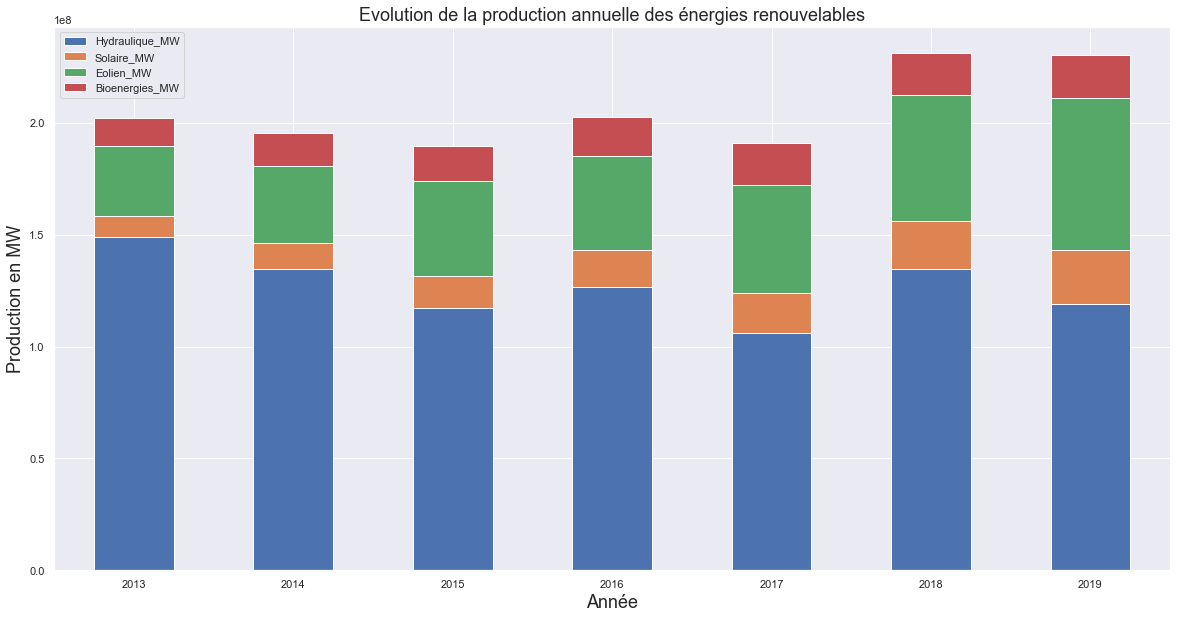

In [25]:
df_annuel_som = df.groupby(['Année'], as_index=False).sum()
ax = df_annuel_som.plot.bar(x='Année', 
                       y=['Hydraulique_MW', 'Solaire_MW', 'Eolien_MW', 'Bioenergies_MW'], 
                       stacked=True, figsize=(20,10),
                       rot=0);
#ax.plot(df_annuel_som['Année'], df_annuel_som['Prod_EnR_MW'], 'k-', label='Production total', linewidth=5, );
ax.set_title('Evolution de la production annuelle des énergies renouvelables', fontsize=18);
ax.set_xlabel('Année', fontsize=18);
ax.set_ylabel('Production en MW', fontsize=18);
plt.legend(loc='best');


>L'analyse de ce graphique nous permet de constater : <br/>
>
>- Une nette amélioration de la production des énergies renouvelables entre 2013 et 2019 
>- Un stabilité de production totale entre 2018 et 2019
>- Une amélioration de la production de l'énergie éolienne au détriment de l'énergie Hyrdaulique entre 2018 et 2019



## Géovisualisation

In [26]:
import pandas as pd
import fiona
import descartes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import geopandas as gpd
import json


from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.models import HoverTool
from bokeh.layouts import widgetbox, row, column

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


to_drop = data.iloc[ :, 14:]
data = data.drop(to_drop, axis = 1)

data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year

values = {'Nucléaire (MW)': 0, 'Pompage (MW)': 0, 'Eolien (MW)' : 0}
data = data.fillna(value=values)

data = data.dropna(subset=['Consommation (MW)'])

data['EnR'] = data['Eolien (MW)'] + data['Solaire (MW)'] + data['Hydraulique (MW)'] + data['Bioénergies (MW)']
data['total_prod'] = data['EnR'] + data['Thermique (MW)'] + data['Nucléaire (MW)'] + data['Pompage (MW)']

data = data.rename(columns ={'Code INSEE région' : 'code_insee', 'Région' : 'region', 'Consommation (MW)' : 'consommation' ,
       'Thermique (MW)' : 'thermique', 'Nucléaire (MW)' : 'nucleaire', 'Eolien (MW)' : 'éolien', 'Solaire (MW)' : 'solaire',
       'Hydraulique (MW)' : 'hydraulique', 'Pompage (MW)' : 'pompage', 'Bioénergies (MW)' : 'bioénergies'})

<hr/> Chargement des données géographique <br/>
<hr/> Source : data.gouv, Contours des régions françaises sur OpenStreetMap <br/>
<hr/> (url: https://www.data.gouv.fr/en/datasets/contours-des-regions-francaises-sur-openstreetmap/#resource-aacf9338-8944-4513-a7b9-4cd7c2db2fa9) <hr/>

In [27]:
#url = "https://public.opendatasoft.com/explore/dataset/contours-geographiques-des-nouvelles-regions-metropole/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
url = "https://www.data.gouv.fr/en/datasets/r/aacf9338-8944-4513-a7b9-4cd7c2db2fa9"
df_map = gpd.read_file(url)

df_map.head()

,code_insee,nom,nuts2,wikipedia,surf_km2,geometry
0,04,La Réunion,FR94,fr:La Réunion,2505.0,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
1,94,Corse,FR83,fr:Corse,8722.0,"MULTIPOLYGON (((8.53996 42.23689, 8.54030 42.2..."
2,02,Martinique,FR92,fr:Martinique,1089.0,"MULTIPOLYGON (((-61.22908 14.82247, -61.22895 ..."
3,11,Île-de-France,FR10,fr:Île-de-France,12069.0,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ..."
4,32,Hauts-de-France,FR22,fr:Nord-Pas-de-Calais-Picardie,31935.0,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0..."


In [36]:
# On renomme la colonne contenant le code insee de la région pour indéxer la fusion avec le df:
df_map = df_map.rename(columns = {'new_code' : 'code_insee'})

# On créer le dataset df_for_map pour faciliter la configuration de la carte:
df_for_map = data.groupby(['code_insee','region', 'year'], as_index = False).sum()

# On converti df_map.code_insee (type object) en int64 pour pouvoir merge (df.code_insee = int64)
df_map['code_insee'] = df_map['code_insee'].astype(str).astype(int)

> Pour gagner en temps de chargement des visualisations on créer un dictionnaire df_dic qui pour chaque année renvoit le dataset de l'année correspondant: 

In [37]:
df_dic = {}
for i in range(2013, 2021):
    df_year = df_for_map[df_for_map['year'] == i]
    df_year['balance_prod_conso'] = df_year['total_prod'] - df_year['consommation']
    df_year['ratio_enr'] = df_year['EnR']/df_year['total_prod']*100
    df_year['ratio_nucleaire'] = df_year['nucleaire']/df_year['total_prod']*100
    df_year['ratio_thermique'] = df_year['thermique']/df_year['total_prod']*100
    df_year['ratio_eolien_enr'] = df_year['éolien']/df_year['EnR']*100
    df_year['ratio_solaire_enr'] = df_year['solaire']/df_year['EnR']*100
    df_year['ratio_hydro_enr'] = df_year['hydraulique']/df_year['EnR']*100
    df_year['ratio_bio_enr'] = df_year['bioénergies']/df_year['EnR']*100
    
    df_dic[i] = df_year


> Toujours pour gagner du temps de chargement, on précharge les données pour chaque année au format geojson avec GeoJSONDataSource <br/>
>Le format geojson permet d'ajouter le widget HoverTool qui affichera des informations pour chaque région sur la carte.
>
>On créer un dictionnaire dico_geo{} qui pour chaque année retourne le GeoJSONDataSource de l'année:


In [38]:
geo_dic = {}
for i in range(2013, 2021):
    merged = pd.merge(df_map, df_dic[i], on='code_insee', how='inner')
    
    merged_json = json.loads(merged.to_json())

    # Convert to json preferred string-like object 
    json_data_map = json.dumps(merged_json)
    
    geosource = GeoJSONDataSource(geojson = json_data_map)
    geo_dic[i] = geosource


> On créer un dataframe df_format pour faciliter la configuration de l'affichage des titres et cihffres du graphique



In [39]:
format_data = [('consommation','0,0', 'Consommation totale'),
               ('total_prod', '0,0', 'Production totale'),
               ('thermique', '0,0', 'Production thermique'),
               ('nucleaire','0,0', 'Production nucléaire'),
               ('EnR', '0,0', 'Production EnR'),
               ('balance_prod_conso', '0,0', 'Ecart entre la production et la consommation')]
 
#Create a DataFrame object from the dictionary 
format_df = pd.DataFrame(format_data, columns = ['field' , 'format', 'verbage'])

> On définie une fonction make_plot(year, variable) pour créer la géovisualisation pour chaque année et variable sélectionnées par l'utilisateur.

In [40]:
# Create a function the returns json_data for the year selected by the user
def make_plot(année, variable):
    # Pull selected year from neighborhood summary data
    df_yr = df_dic[année]
    
    geosource = geo_dic[année]

    # Set the format of the colorbar
    min_range = df_yr[variable].min()
    max_range = df_yr[variable].max()
    field_format = format_df.loc[format_df['field'] == variable, 'format'].iloc[0]
    
    # Define a sequential multi-hue color palette.
    
    if variable == 'EnR':
        palette = brewer['Greens'][8]
    elif variable == 'consommation':
        palette = brewer['Blues'][8]
    elif variable == 'nucleaire':
        palette = brewer['Oranges'][8]
    elif variable == 'total_prod':
        palette = brewer['Reds'][8]
    elif variable == 'thermique':
        palette = brewer['Greys'][8]
    elif variable == 'balance_prod_conso':
        palette = brewer['RdYlGn'][8]
    

    # Reverse color order so that dark blue is highest obesity.
    palette = palette[::-1]


    # Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = min_range, high = max_range)

    # Create color bar.
    format_tick = NumeralTickFormatter(format=field_format)
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=18, formatter=format_tick,
    border_line_color=None, location = (0, 0))

    # Create figure object.
    verbage = format_df.loc[format_df['field'] == variable, 'verbage'].iloc[0]
    

    p = figure(title = verbage + ' à échelle régionale en '+ str(année),
             plot_height = 650, plot_width = 850,
             toolbar_location = None)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.axis.visible = False

    # Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource, fill_color = {'field' : variable, 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

    # Specify color bar layout.
    p.add_layout(color_bar, 'right')
    
    hover = HoverTool(tooltips = [('Région      ','@region'),
                                  ('Consommation totale en MW      ', '@consommation{,} (MW)'),
                                  ('Balance      ', '@balance_prod_conso{,} (MW)'),
                                  ('Production totale', '@total_prod{,} (MW)'),
                                  ('Nucléaire', '@ratio_nucleaire{,} %'),
                                  ('Thermique', '@ratio_thermique{,} %'),
                                  ('EnR', '@ratio_enr{,} %'),
                                  ('dont éolien', '@ratio_eolien_enr{,} %'),
                                  ('dont solaire', '@ratio_solaire_enr{,} %'),
                                  ('dont hydraulique', '@ratio_hydro_enr{,} %'),
                                  ('dont bioénergies', '@ratio_bio_enr{,} %')])
                      
    # Add the hover tool to the graph
    p.add_tools(hover)

    # Input geojson source that contains features for plotting for:
    # initial year 2013 and initial criteria sale_price_median
    

    return show(p)

output_notebook()

interact(make_plot, année=widgets.IntSlider(min=2013, max=2019, step=1, value=2013),
         variable = [('Consommation', 'consommation'),
                     ('Production totale','total_prod',),
                     ( 'Production thermique', 'thermique'),
                     ('Production EnR', 'EnR'),
                     ('Ecart entre production et consommation', 'balance_prod_conso')]);

Loading BokehJS ...

interactive(children=(IntSlider(value=2013, description='année', max=2019, min=2013), Dropdown(description='va…